In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import pandas_profiling
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

In [2]:
df = pd.read_csv('/home/ataur/Downloads/Datasets_PCA_Problem Statement/wine.csv')

In [3]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [7]:
df.duplicated().sum()

0

# Outlier Checking and Treatmen

Type                   AxesSubplot(0.125,0.71587;0.168478x0.16413)
Alcohol             AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Malic               AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Ash                 AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Alcalinity            AxesSubplot(0.125,0.518913;0.168478x0.16413)
Magnesium          AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Phenols            AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Flavanoids         AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Nonflavanoids         AxesSubplot(0.125,0.321957;0.168478x0.16413)
Proanthocyanins    AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Color              AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Hue                AxesSubplot(0.731522,0.321957;0.168478x0.16413)
Dilution                 AxesSubplot(0.125,0.125;0.168478x0.16413)
Proline               AxesSubplot(0.327174,0.125;0.168478x0.16413)
dtype: object

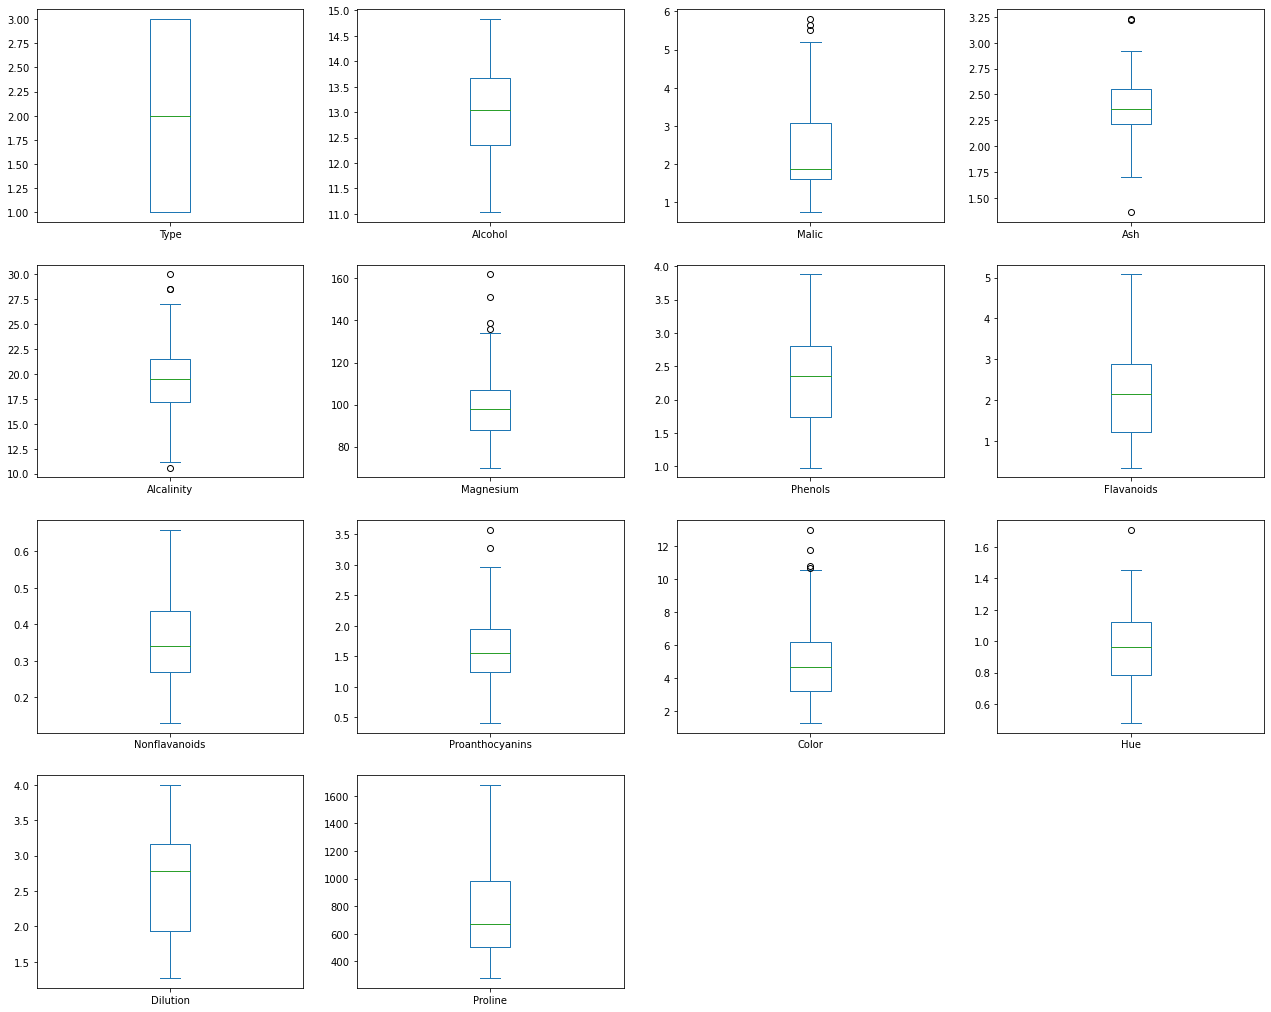

In [9]:
df.plot(kind='box', subplots=True, layout=(4,4), fontsize=10, figsize=(22,18))

# Outliers Treatments

In [10]:
# first Column
iqr = df['Malic'].quantile(0.75) - df['Malic'].quantile(0.25)
iqr

1.4799999999999998

In [11]:
lower_limit = df['Malic'].quantile(0.25) - 1.5*(iqr)
lower_limit

-0.6174999999999995

In [12]:
upper_limit = df['Malic'].quantile(0.75) + 1.5*(iqr)
upper_limit

5.3025

In [13]:
df['Malic'] = np.where(df['Malic'] > upper_limit, upper_limit, np.where(df['Malic'] < lower_limit, lower_limit, df['Malic']))

In [14]:
# Second Column
iqr = df['Ash'].quantile(0.75) - df['Ash'].quantile(0.25)
iqr

0.34750000000000014

In [15]:
lower_limit = df['Ash'].quantile(0.25) - 1.5*(iqr)
lower_limit

1.6887499999999998

In [16]:
upper_limit = df['Ash'].quantile(0.75) + 1.5*(iqr)
upper_limit

3.0787500000000003

In [17]:
df['Ash'] = np.where(df['Ash'] > upper_limit, upper_limit, np.where(df['Ash'] < lower_limit, lower_limit, df['Ash']))

In [18]:
# Third column
iqr = df['Alcalinity'].quantile(0.75) - df['Alcalinity'].quantile(0.25)
iqr

4.300000000000001

In [19]:
lower_limit = df['Alcalinity'].quantile(0.25) - 1.5*(iqr)
lower_limit

10.749999999999998

In [20]:
upper_limit = df['Alcalinity'].quantile(0.75) + 1.5*(iqr)
upper_limit

27.950000000000003

In [21]:
df['Alcalinity'] = np.where(df['Alcalinity'] > upper_limit, upper_limit, np.where(df['Alcalinity'] < lower_limit, lower_limit, df['Alcalinity']))

In [22]:
# Forth column
iqr = df['Magnesium'].quantile(0.75) - df['Magnesium'].quantile(0.25)
iqr

19.0

In [23]:
lower_limit = df['Magnesium'].quantile(0.25) - 1.5*(iqr)
lower_limit

59.5

In [24]:
upper_limit = df['Magnesium'].quantile(0.75) + 1.5*(iqr)
upper_limit

135.5

In [25]:
df['Magnesium'] = np.where(df['Magnesium'] > upper_limit, upper_limit, np.where(df['Magnesium'] < lower_limit, lower_limit, df['Magnesium']))

In [26]:
# Fifth column
iqr = df['Proanthocyanins'].quantile(0.75) - df['Proanthocyanins'].quantile(0.25)
iqr

0.7

In [27]:
lower_limit = df['Proanthocyanins'].quantile(0.25) - 1.5*(iqr)
lower_limit

0.20000000000000018

In [28]:
upper_limit = df['Proanthocyanins'].quantile(0.75) + 1.5*(iqr)
upper_limit

3.0

In [29]:
df['Proanthocyanins'] = np.where(df['Proanthocyanins'] > upper_limit, upper_limit, np.where(df['Proanthocyanins'] < lower_limit, lower_limit, df['Proanthocyanins']))

In [30]:
# Sixth column
iqr = df['Color'].quantile(0.75) - df['Color'].quantile(0.25)
iqr

2.9800000000000004

In [31]:
lower_limit = df['Color'].quantile(0.25) - 1.5*(iqr)
lower_limit

-1.2500000000000009

In [32]:
upper_limit = df['Color'].quantile(0.75) + 1.5*(iqr)
upper_limit

10.670000000000002

In [33]:
df['Color'] = np.where(df['Color'] > upper_limit, upper_limit, np.where(df['Color'] < lower_limit, lower_limit, df['Color']))

In [34]:
# Seven column
iqr = df['Hue'].quantile(0.75) - df['Hue'].quantile(0.25)
iqr

0.33750000000000013

In [35]:
lower_limit = df['Hue'].quantile(0.25) - 1.5*(iqr)
lower_limit

0.2762499999999998

In [36]:
upper_limit = df['Hue'].quantile(0.75) + 1.5*(iqr)
upper_limit

1.6262500000000002

In [37]:
df['Hue'] = np.where(df['Hue'] > upper_limit, upper_limit, np.where(df['Hue'] < lower_limit, lower_limit, df['Hue']))

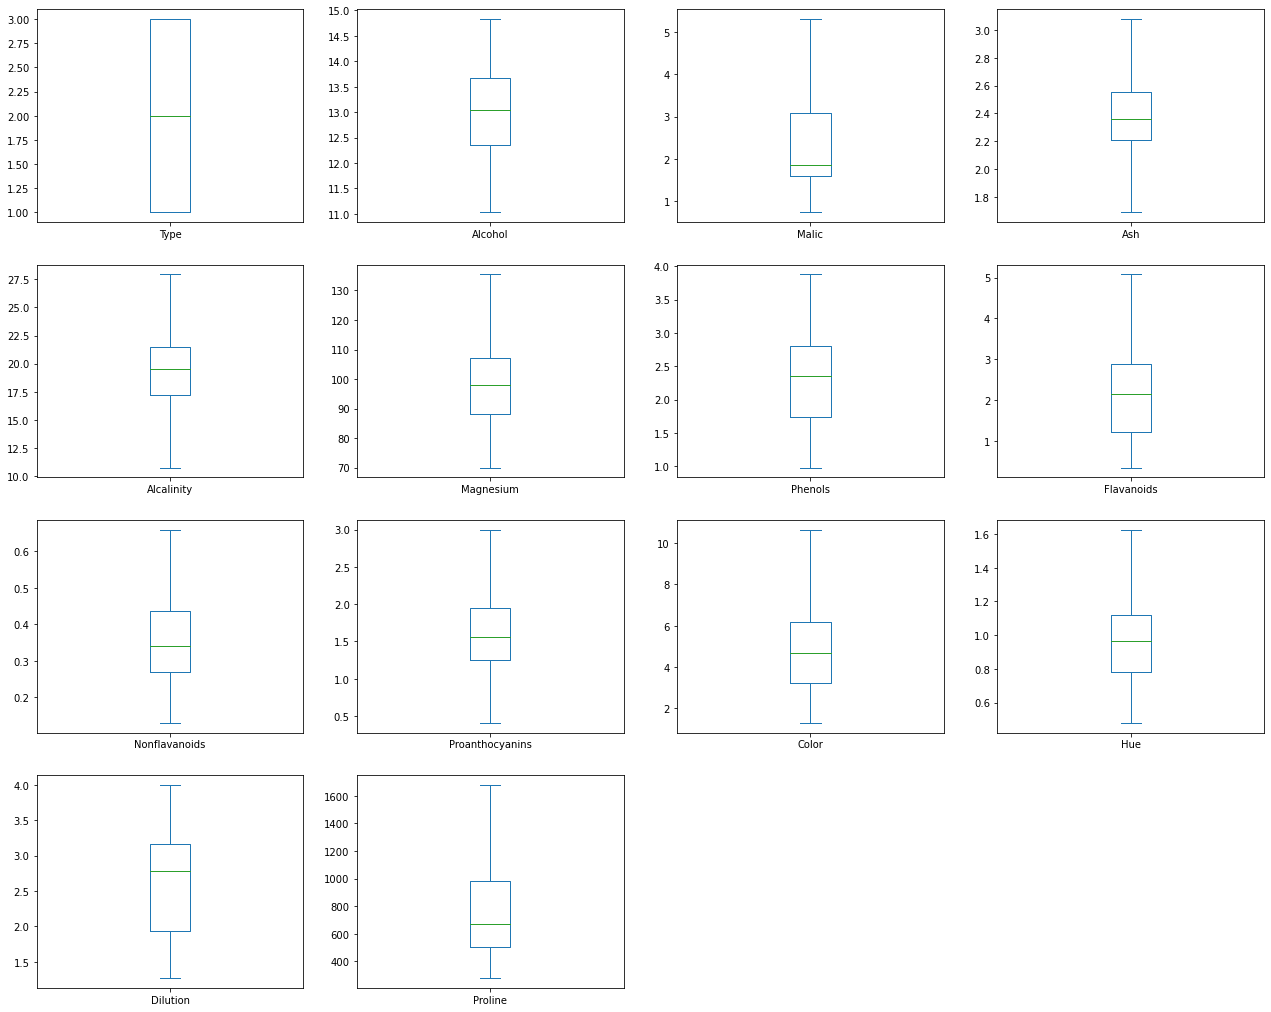

In [40]:
df.plot(kind='box', subplots=True, layout=(4,4), fontsize=10, figsize=(22,18));

# Normalization

In [44]:
def norm_func(i):
    x = (i-i.min()) / (i.max()-i.min())
    return(x)

In [45]:
df_norm = norm_func(df.iloc[:, 0:])

In [46]:
df_norm

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.0,0.842105,0.212603,0.533273,0.281977,0.870229,0.627586,0.573840,0.283019,0.725869,0.464324,0.488550,0.970696,0.561341
1,0.0,0.571053,0.227945,0.324640,0.026163,0.458015,0.575862,0.510549,0.245283,0.335907,0.330138,0.497274,0.780220,0.550642
2,0.0,0.560526,0.355068,0.705935,0.456395,0.473282,0.627586,0.611814,0.320755,0.926641,0.468584,0.479826,0.695971,0.646933
3,0.0,0.878947,0.265205,0.583633,0.351744,0.656489,0.989655,0.664557,0.207547,0.683398,0.694356,0.331516,0.798535,0.857347
4,0.0,0.581579,0.405479,0.849820,0.595930,0.732824,0.627586,0.495781,0.490566,0.544402,0.323749,0.488550,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.0,0.705263,1.000000,0.547662,0.566860,0.381679,0.241379,0.056962,0.735849,0.250965,0.683706,0.139586,0.172161,0.329529
174,1.0,0.623684,0.694795,0.569245,0.712209,0.488550,0.282759,0.086498,0.566038,0.386100,0.641108,0.191930,0.106227,0.336662
175,1.0,0.589474,0.775890,0.410971,0.537791,0.763359,0.210345,0.073840,0.566038,0.362934,0.949947,0.095965,0.106227,0.397290
176,1.0,0.563158,0.405479,0.490108,0.537791,0.763359,0.231034,0.071730,0.754717,0.405405,0.854100,0.104689,0.128205,0.400856


In [47]:
df_norm.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.469101,0.518584,0.348589,0.487749,0.507447,0.450124,0.453487,0.356386,0.437460,0.454080,0.400229,0.416121,0.491460,0.334446
std,0.387517,0.213639,0.241134,0.189716,0.191149,0.204797,0.215811,0.210730,0.234818,0.215503,0.240775,0.198120,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.350658,0.189041,0.375000,0.375000,0.274809,0.262931,0.182489,0.264151,0.324324,0.206603,0.263904,0.244505,0.158702
50%,0.500000,0.531579,0.246575,0.482914,0.508721,0.427481,0.474138,0.378692,0.396226,0.442085,0.363152,0.423119,0.553114,0.282097
75%,1.000000,0.696711,0.513425,0.625000,0.625000,0.564885,0.627586,0.534810,0.580189,0.594595,0.523962,0.558342,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# scree Plot

In [48]:
twss = []

In [49]:
k = list(range(2,9))

In [50]:
for i in k:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    twss.append(kmeans.inertia_)

In [51]:
twss

[87.19856560109284,
 59.745078749328854,
 54.7704963331595,
 51.98235421337194,
 49.05356108112448,
 47.05041883349373,
 44.31695444710295]

Text(0, 0.5, 'Total within ss')

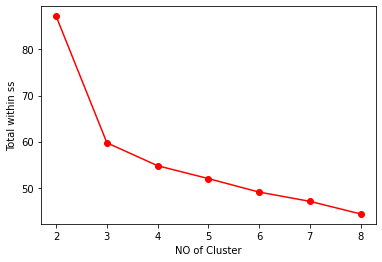

In [53]:
plt.plot(k, twss, 'ro-');plt.xlabel('NO of Cluster');plt.ylabel('Total within ss')

In [54]:
model = KMeans(n_clusters=3)
model.fit(df_norm)

KMeans(n_clusters=3)

In [55]:
model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [57]:
c_l = pd.Series(model.labels_)

In [58]:
df['Clust'] = c_l

In [59]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Clust
0,1,14.23,1.7100,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.7800,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.3600,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.9500,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.5900,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.3025,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,3,13.40,3.9100,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,3,13.27,4.2800,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,3,13.17,2.5900,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    float64
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
 14  Clust            178 non-null    int32  
dtypes: float64(12), int32(1), int64(2)
memory usage: 20.3 KB


In [61]:
df =df.iloc[:, [14,0,1,2,3,4,5,6,7,8,9,10,11,12,13]]

In [62]:
df

,Clust,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,2,1,14.23,1.7100,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,2,1,13.20,1.7800,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,2,1,13.16,2.3600,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,2,1,14.37,1.9500,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,2,1,13.24,2.5900,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0,3,13.71,5.3025,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,0,3,13.40,3.9100,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,0,3,13.27,4.2800,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,0,3,13.17,2.5900,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [65]:
df.iloc[:,2:].groupby(df['Clust']).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Clust,,,,,,,,,,,,,
0,13.151633,3.333163,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.270816,0.685918,1.690204,627.551020
1,12.257246,1.901341,2.241123,20.050000,93.427536,2.252609,2.076232,0.362319,1.613188,3.057971,1.054525,2.786232,512.826087
2,13.732167,2.005000,2.455646,17.219167,106.825000,2.847833,2.980833,0.288667,1.900333,5.492000,1.066167,3.163500,1113.533333


In [66]:
df.iloc[:,2:].groupby(df['Clust']).median()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Clust,,,,,,,,,,,,,
0,13.160,3.270,2.380,21.0,97.0,1.650,0.690,0.470,1.110,7.5,0.67,1.68,625.0
1,12.290,1.610,2.240,20.0,88.0,2.200,2.030,0.370,1.560,2.9,1.04,2.83,488.0
2,13.745,1.765,2.445,16.9,104.5,2.825,2.975,0.285,1.895,5.4,1.07,3.17,1087.5


In [67]:
df.iloc[:,2:].groupby(df['Clust']).std()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Clust,,,,,,,,,,,,,
0,0.524898,1.056272,0.183520,2.239868,10.968686,0.353257,0.312557,0.125014,0.410006,2.175215,0.115451,0.273271,115.068469
1,0.530341,0.975771,0.299136,3.120556,13.863907,0.533605,0.706730,0.120735,0.574895,0.914129,0.198116,0.487325,149.030786
2,0.468438,0.684104,0.218543,2.891133,11.069436,0.341279,0.394291,0.070217,0.408677,1.259819,0.119846,0.356783,220.282751
